# customer segment

#### Mengheng Xue, Junbi Shen, Huidong Xu

#### Due: 2019-04-03

### import libraries

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ====================plot setting ===============
pd.options.display.max_colwidth = 70

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.8)

### import dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mocked_Customer_Data.csv')
dataset.head(5)
dataset.columns

Index(['cust_id', 'gender', 'marrital', 'age', 'home_owner', 'num_cont',
       'tot_bill', 'tot_call', 'tot_bal', 'fortune', 'tot_bytes', 'tot_air',
       'num_out', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air'],
      dtype='object')

### K-mean clustering

In [3]:
num_vars = ['age', 'tot_bill', 'tot_call','tot_bytes', 'tot_air', 'num_out', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air']
dataset_nums = dataset.loc[:, num_vars]
X = dataset_nums.values

# standardize all values
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

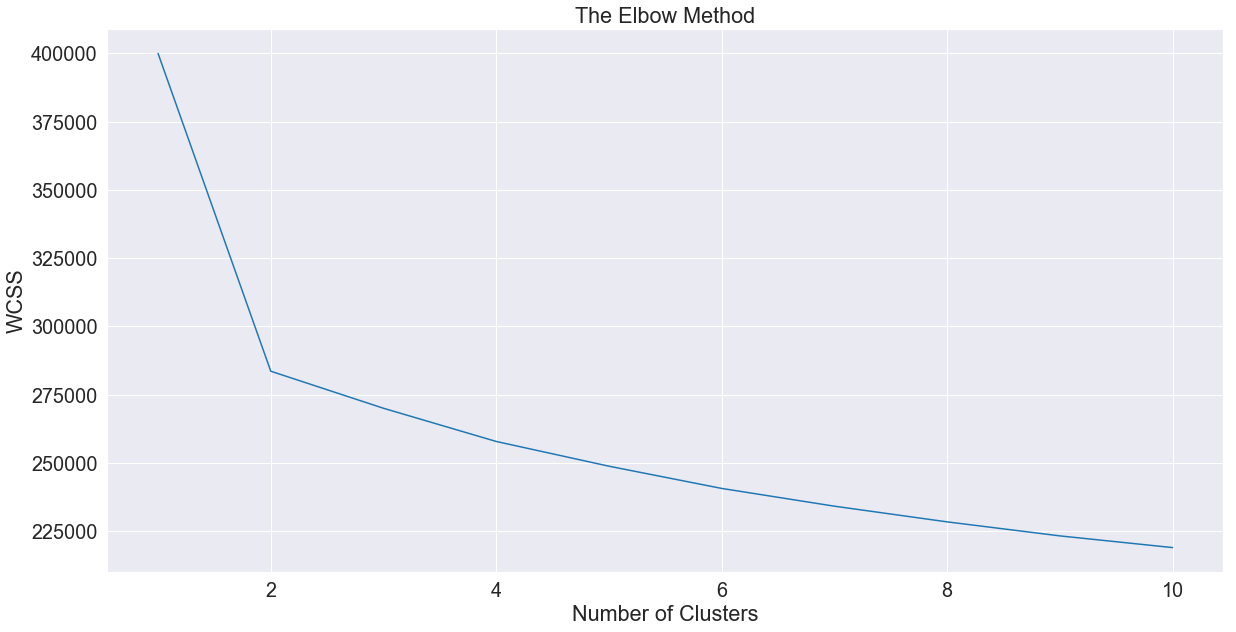

In [6]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

+ based on the elbow method we find the optimal number of clusters is 2, since WCSS drops most when no. of clusters = 2.

In [7]:
# Applying the k-means to the mall dataset
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_norm)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

### Visualizing the clusters
+ For visulizing purpose, we only choose normalized yahoo air and normalized total air to draw the pair-wise plot to show our k-mean clustering performance  

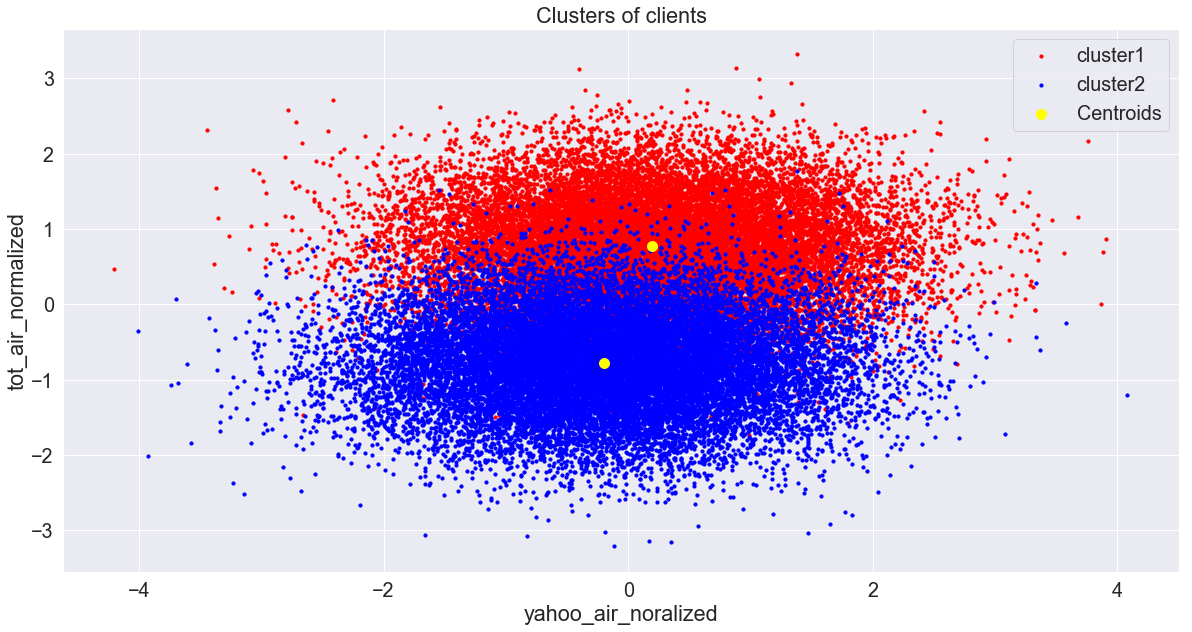

In [10]:
# Visualizing the clusters
plt.scatter(X_norm[y_kmeans == 0, -6], X_norm[y_kmeans == 0, -1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(X_norm[y_kmeans == 1,  -6], X_norm[y_kmeans == 1, -1], s = 10, c = 'blue', label = 'cluster2')
# plt.scatter(X[y_kmeans == 2,  -6], X[y_kmeans == 2, -1], s = 10, c = 'green', label = 'cluster3')
# plt.scatter(X[y_kmeans == 3,  -6], X[y_kmeans == 3, -1], s = 10, c = 'cyan', label = 'cluseter4')
# plt.scatter(X[y_kmeans == 4,  -6], X[y_kmeans == 4, -1], s = 10, c = 'magenta', label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:,  -6],  kmeans.cluster_centers_[:, -1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('yahoo_air_noralized')
plt.ylabel('tot_air_normalized')
plt.legend()
plt.show()

### Pair-wise plots of k-mean clusters 
+ From pair-wise plots of clusters we could find that most pairs of features are not separated completely by our k-mean method. 
+ One improvement method is that we could use PCA to reduce the dimension of input features， which can reduce the correlation between each features then achieve better clustering performance. 

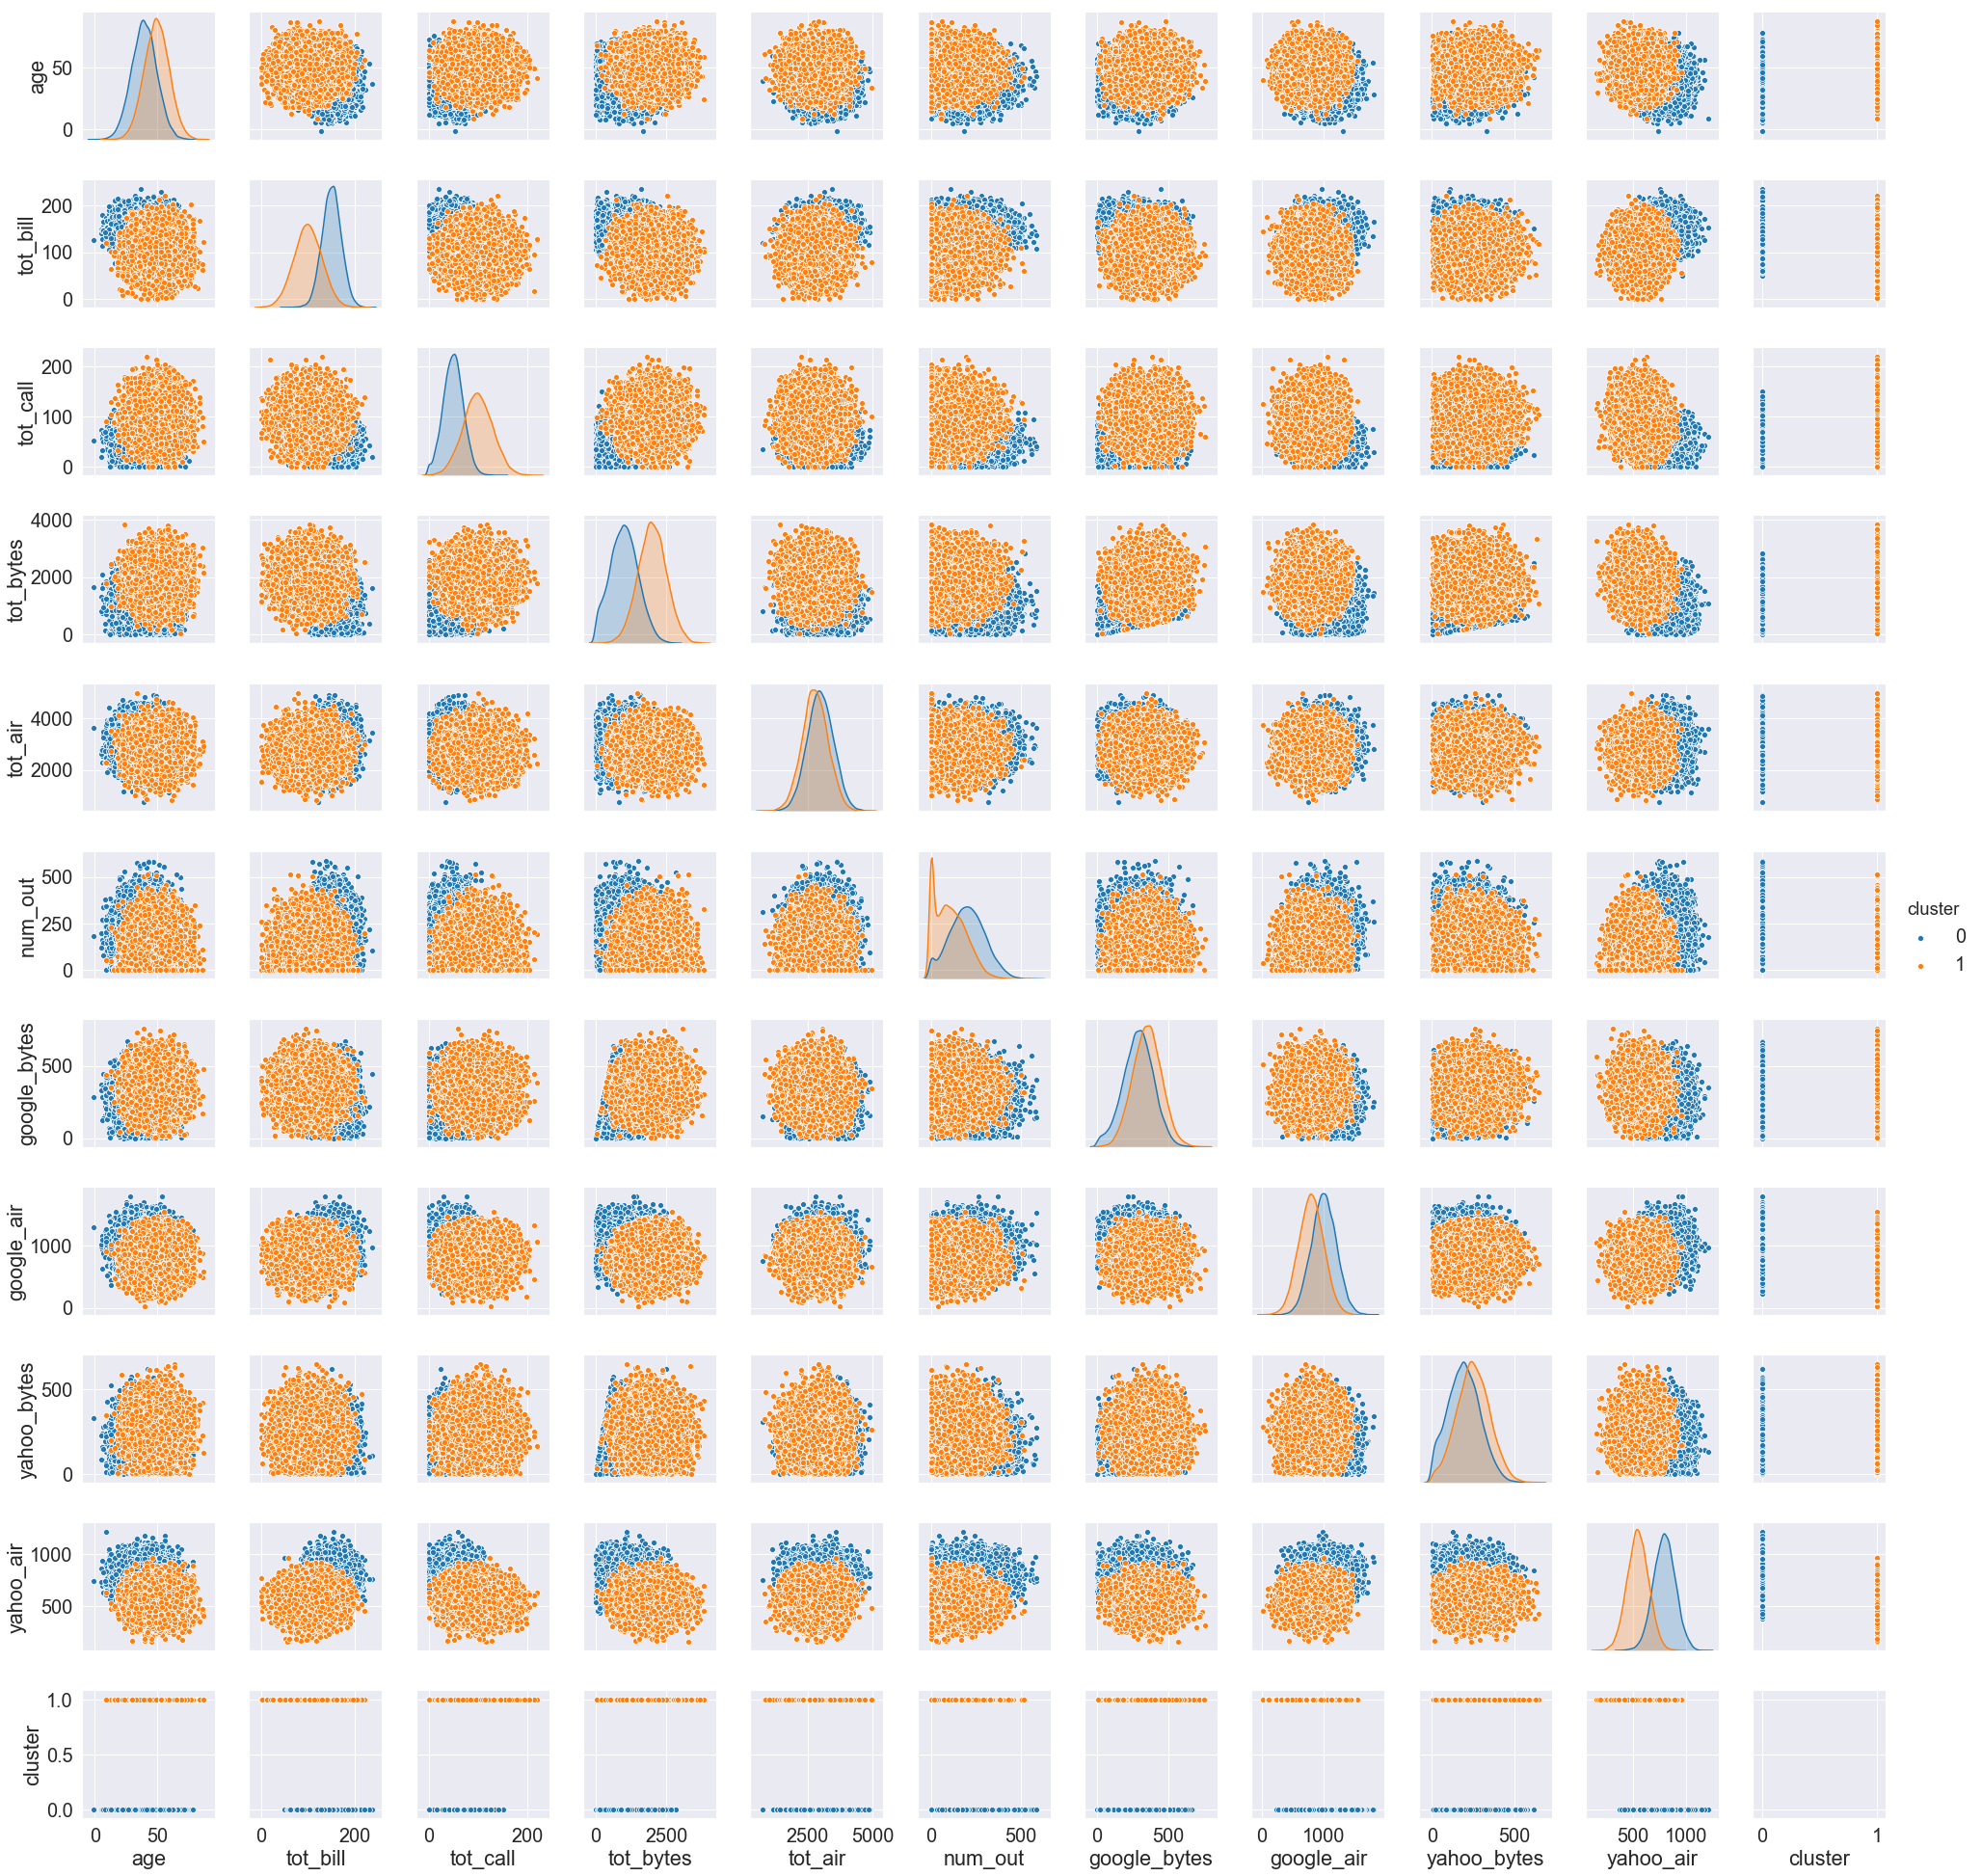

In [11]:
y_kmeans = pd.DataFrame(y_kmeans).rename(columns={0:'cluster'})
dataset_new = pd.concat([dataset_nums, y_kmeans], axis=1) # generate new dataframe for pairwise plot 
sn.pairplot(dataset_new, hue='cluster')

### Hierarchical Clustering
+ For the comparesion purpose with k-mean clustering, we only use numeric variables for hierarchical clustering.

### plot dendrogram
+ Since it takes so long to plot dendrogram for the whole dataset, I just use the first 1000 data to demonstrate dendrogram.
+ We could see that if we just use the first 10000 data, 2 clusters may be the best choices.

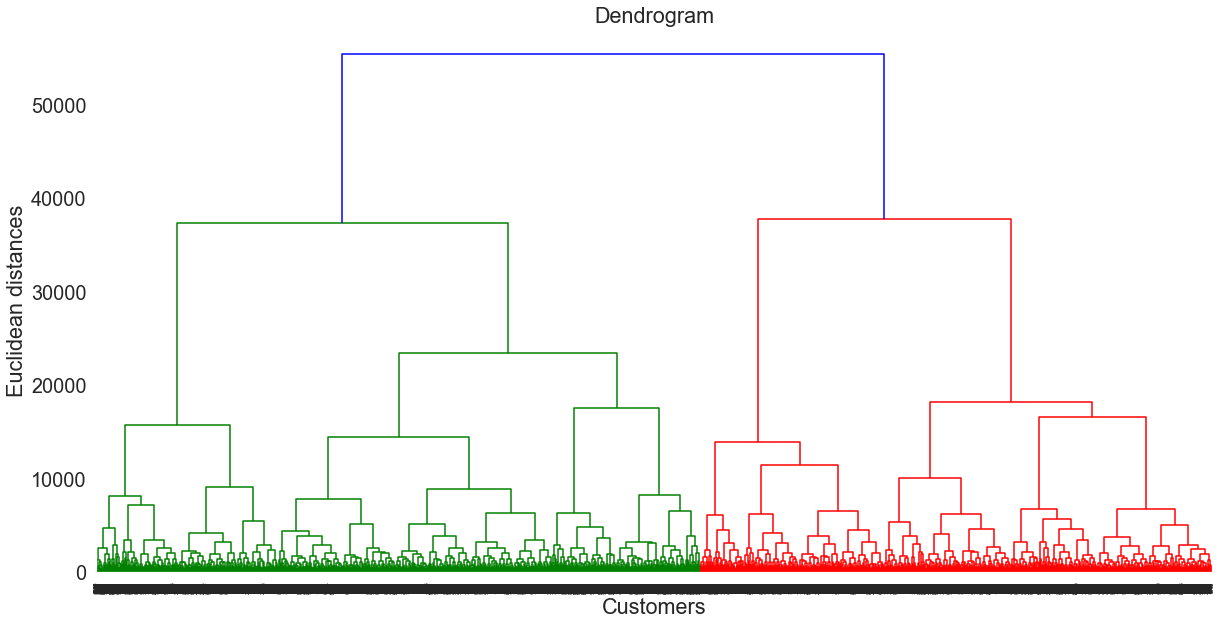

In [22]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X[0:10000], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Pair-wise plots of Hierarchical Clusters
+ We could see that simliar clustering performance with k-mean.

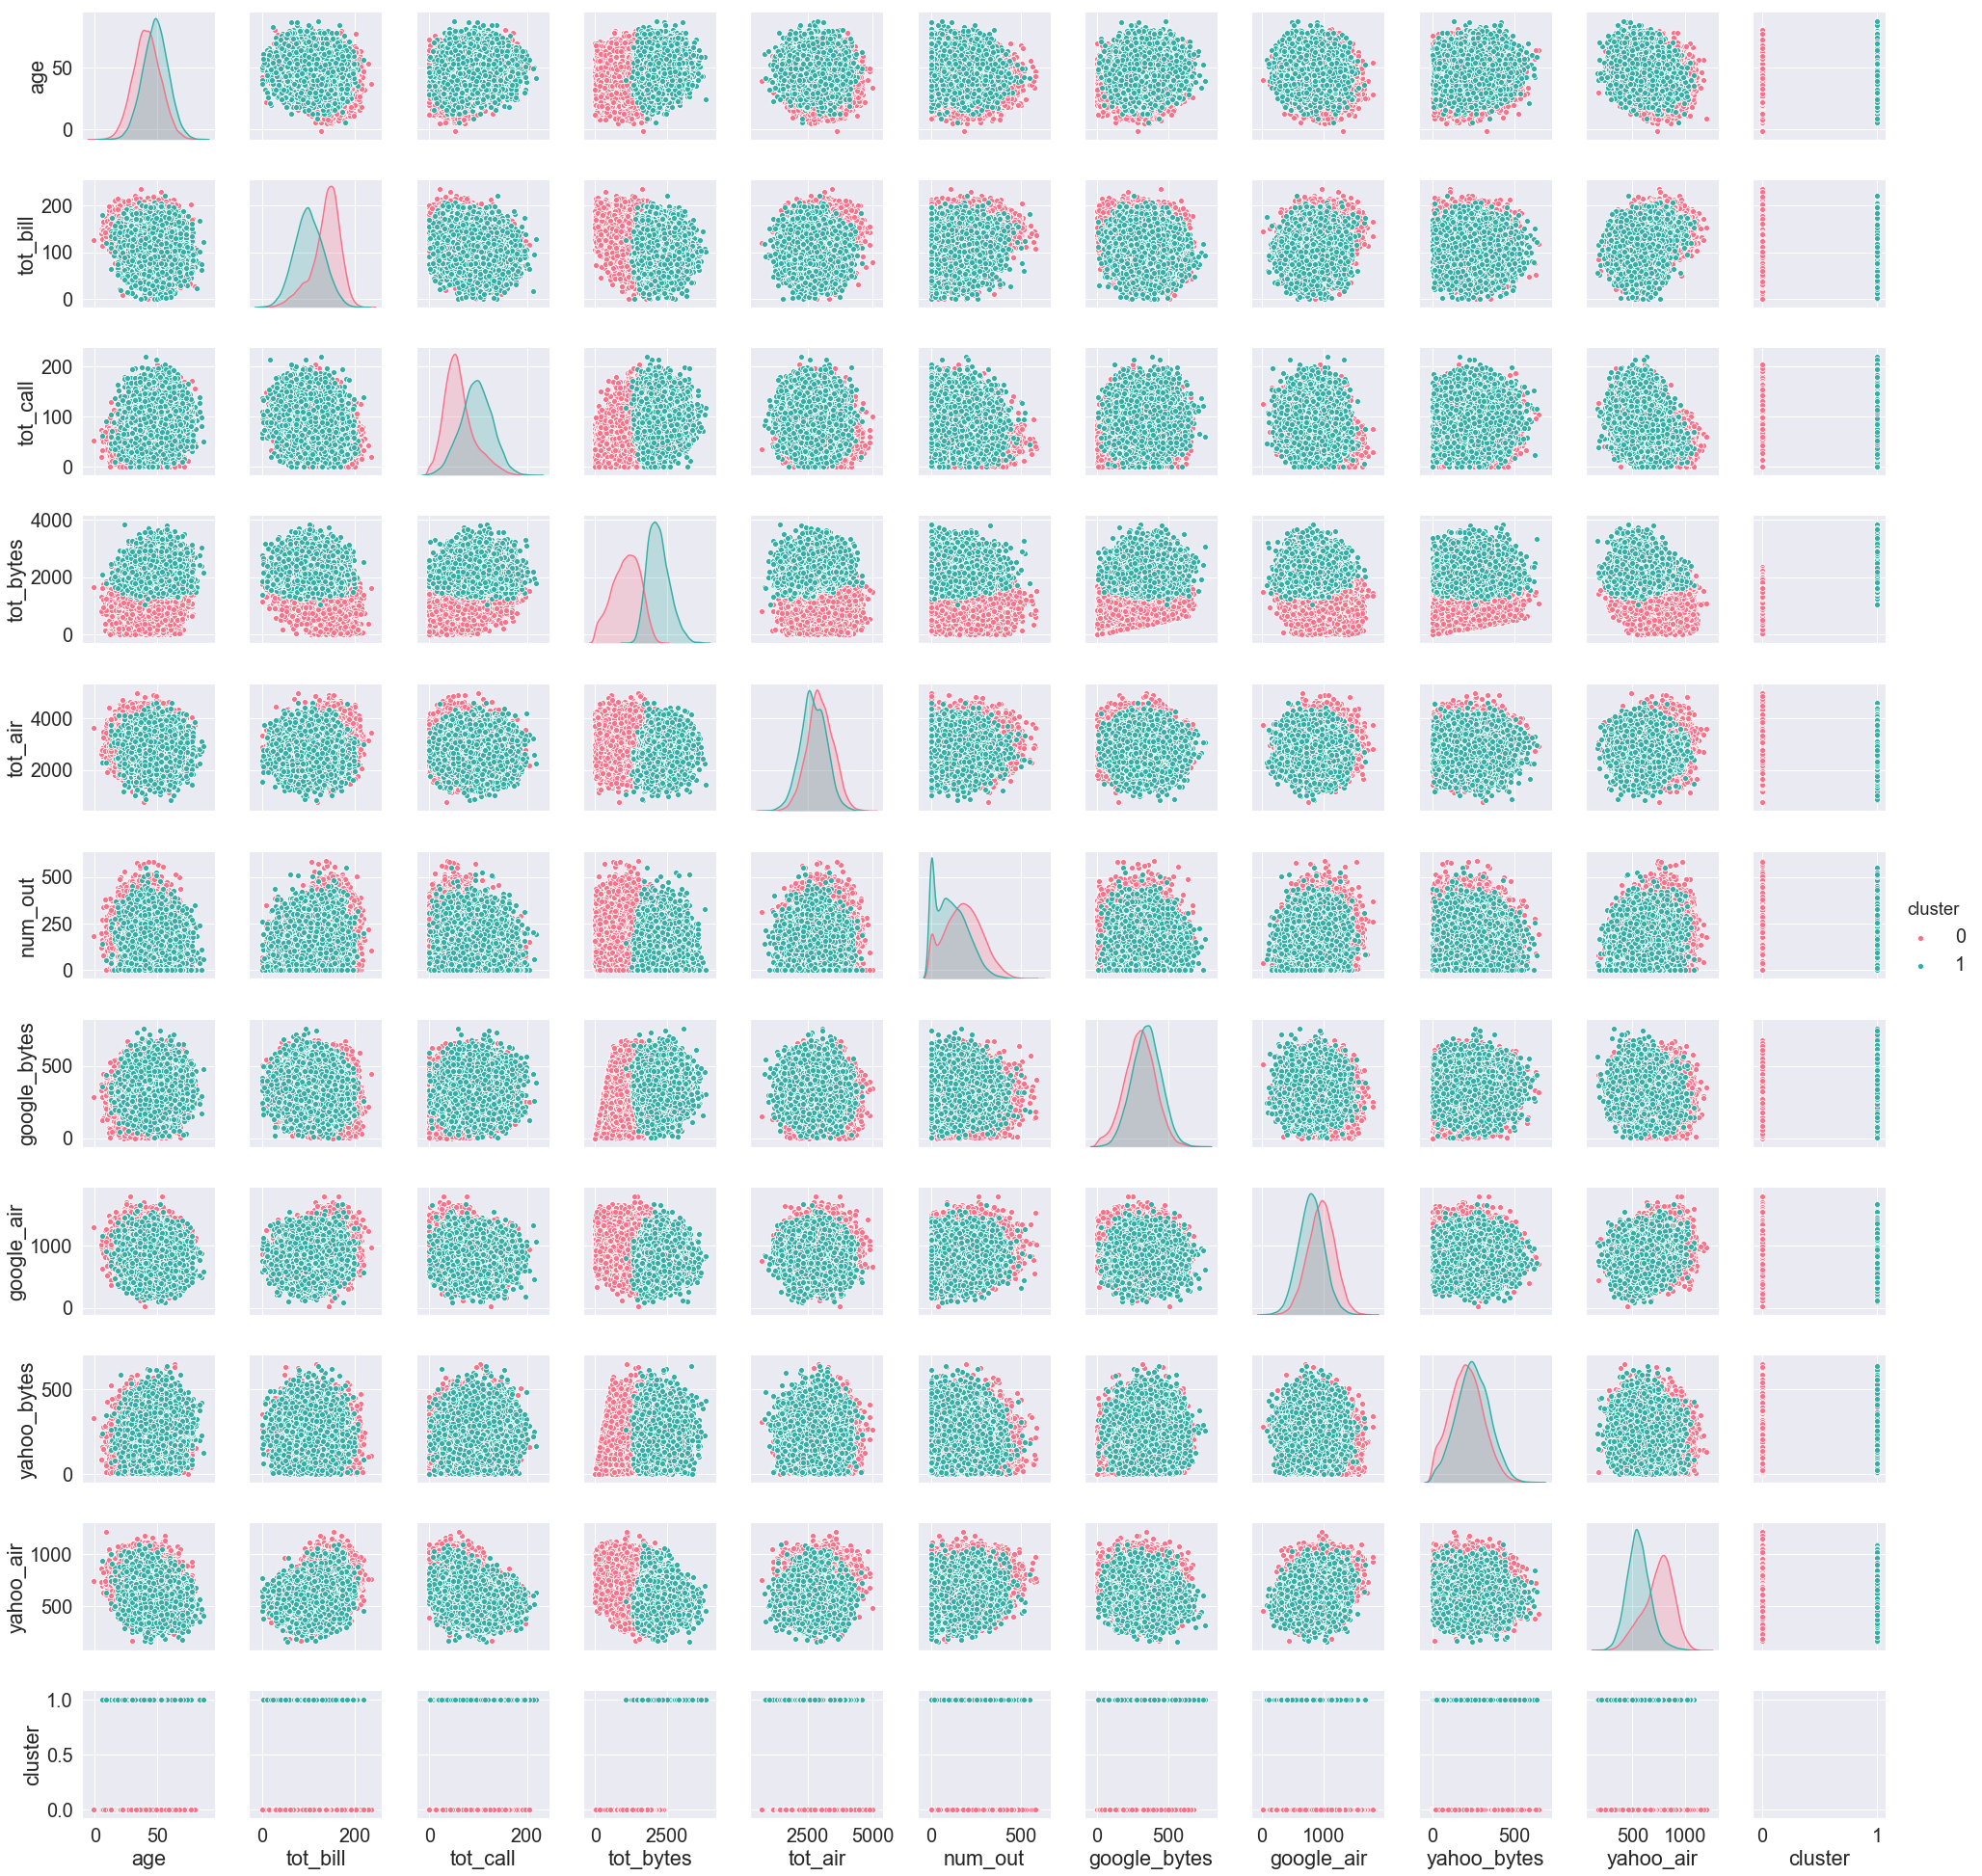

In [24]:
y_hc = pd.DataFrame(y_hc).rename(columns={0:'cluster'})
dataset_hc = pd.concat([dataset_nums, y_hc], axis=1) # generate new dataframe for pairwise plot 
sn.pairplot(dataset_hc, hue="cluster", palette="husl")